In [1]:
import pandas as pd
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from datetime import datetime

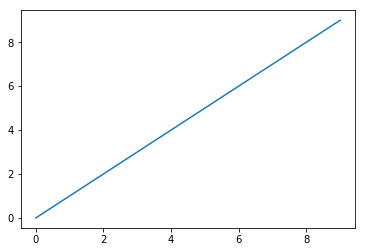

In [2]:
%matplotlib inline
plt.plot(np.arange(10))

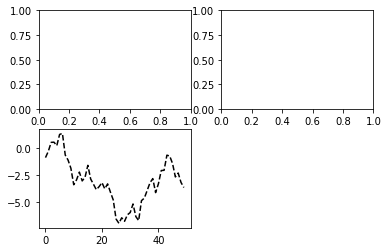

In [3]:
# サブプロット
# 三つのサブプロットを持ったグラフを作る
# (2, 2)のサブプロット
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
# plt.plotは最後のサブプロットに適応される
plt.plot(randn(50).cumsum(), 'k--')

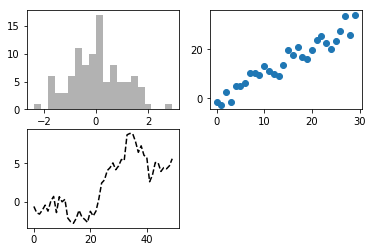

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

# ヒストグラムを作る
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
# 散布図を作る
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))
# デフォルトのプロットは折れ線グラフ
ax3.plot(randn(50).cumsum(), 'k--')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb001d6b7f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fb001be41d0>]], dtype=object)

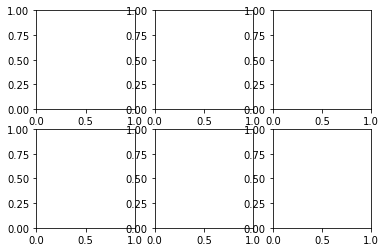

In [5]:
# plt.subplotsを使えば何度もplt.add_subplotする必要がなくなる
fig, axes = plt.subplots(2, 3)
axes

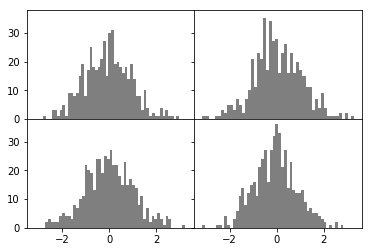

In [6]:
# plt.subplotsで作ったサブプロットをfor文で回す
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)

# plt.subplots_adjustで図のまわりの空白を調整する
plt.subplots_adjust(wspace=0, hspace=0)

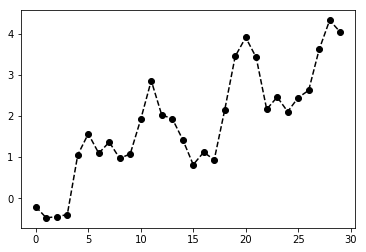

In [7]:
# oオプションでデータポイントにマーカーを付ける
plt.plot(randn(30).cumsum(), 'ko--')

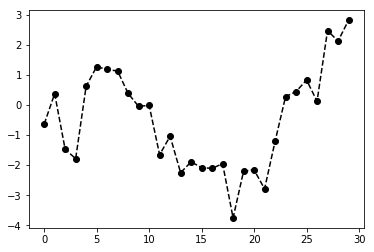

In [8]:
# markerキーワード引数でより明示的にデータポイントにマーカーをつける
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

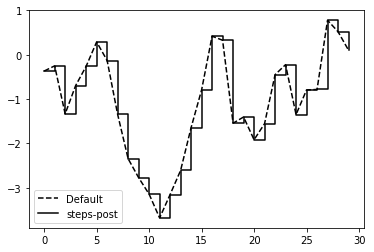

In [9]:
# drawstyleオプションで折れ線のスタイルを変更できる
data = randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

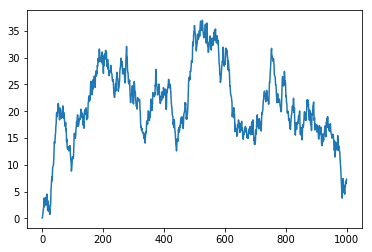

In [10]:
# メモリ、ラベル、凡例をつけてみる
# まずはデフォルトのプロット
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())

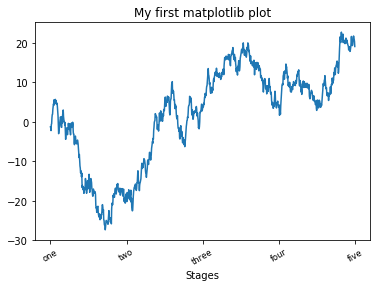

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())

# x軸のどこに目盛りをつけるかを指定する
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
# 目盛りにラベルをつける
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')
# x軸にタイトルをつける
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')
ax

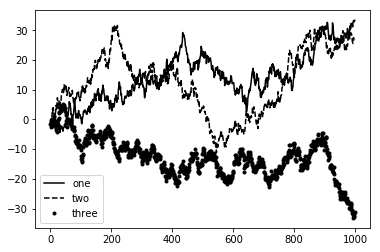

In [12]:
# 凡例を付けてみる
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
# 凡例の位置をここで指定する
ax.legend(loc='best')

In [13]:
# 注釈をつけてみる
# まずはデータセットを確認
data = pd.read_csv('spx.csv', index_col=0, parse_dates=True)
data.head()

,SPX
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75


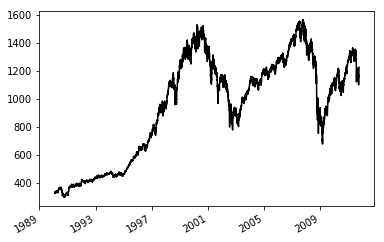

In [14]:
# プロットしてみる
data = pd.read_csv('spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
spx.plot(ax=ax, style='k-')

Text(0.5,1,'Important dates in 2008-2009 financial crisis')

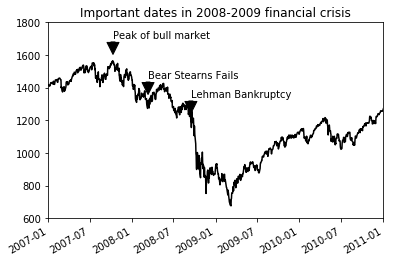

In [15]:
# 注釈をつけてみる
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    # 矢印の先をxyキーワードで指定
    # 注釈の位置をxytextキーワードで指定
    # 矢印の形をallowpropsキーワードでで指定
    # horizontalalignmen, verticalalignmentキーワードで矢印と注釈の相対位置を指定
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', verticalalignment='top')

# 2007-2010年をズーム
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

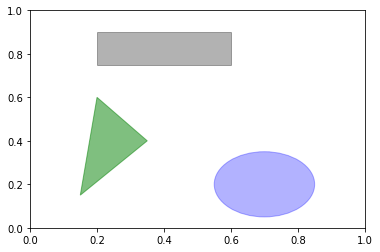

In [16]:
# 図形をプロットするときはこう
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

plt.savefig('figpath.svg')